In [1]:
%load_ext autoreload
%autoreload 2

# Exploration and visualization generated with `diff-gather-stats` script

This notebook examines results of running the `diff-gather-stats` script,
generated from the [`gather_data.py`](../src/diffannotator/gather_data.py)
source file.

The exploration would involve various open source projects repositories.

The list of different example repositories is taken from the
[GitVision app demo site](https://gitvis.web.app/).

- Large repositories:
  - [TensorFlow](https://github.com/tensorflow/tensorflow): A comprehensive machine learning library by Google<br>
    This repo provides a great example of a large, complex open-source project with a very active community.
  - ...

## TensorFlow repository

This repository was cloned with
```commandline
git clone https://github.com/tensorflow/tensorflow.git
```

### File purposes

> **NOTE:** the file from below should be put in the repository,
> in `data/`, or `data/examples/`, or `notebooks/data/`.

In [3]:
import json
from collections import Counter, defaultdict

The annotation data was generated from the `tensorflow` repository with the following command:
```commandline
diff-annotate from-repo \
    --output-dir=~/example_annotations/tensorflow/ezhulenev/ \
    ~/example_repositories/tensorflow/ \
    --author=ezhulenev@google.com
```

This generates annotations in the "flat" format.

To make them compatibile with "hierarchical" / "bugsinpy" format that `diff-gather-stats` script expects
you need to create `annotation/` directory in each of "bug" directories, and move `*.json` files there:
```commandline
cd ~/example_annotations/tensorflow/ezhulenev/
mkdir annotation
mv *.json annotation/
```

The statistics in `tensorflow.purpose-per-file.json` file were generated with the following command:
```commandline
diff-gather-stats purpose-per-file \
    ~/example_annotations/tensorflow.purpose-per-file.json \
    ~/example_annotations/tensorflow/
```

In [3]:
with open('/home/jnareb/example_annotations/tensorflow.purpose-per-file.json', mode='r') as json_fp:
    tf_ezhulenev_per_file_data = json.load(json_fp)

In [4]:
#tf_ezhulenev_per_file_data

In [5]:
# There is only one "dataset", and only one "bug"
ezhulenev_per_file_data = tf_ezhulenev_per_file_data['tensorflow']['ezhulenev']

ezhulenev_records = []
for patch_name, patch_data in ezhulenev_per_file_data.items():
    for file_name, purposes in patch_data.items():
        if file_name == '/dev/null':
            continue

        record = {
            'patchname': patch_name.removesuffix('.json'),
            'filename': file_name,
        }
        purpose_counter = Counter()
        
        for p in purposes:
            purpose_counter[p] += 1

        record.update(dict(purpose_counter))

        ezhulenev_records.append(record)

In [6]:
# show example
ezhulenev_records[:10]

[{'patchname': '0e8cbd4649c244488b405613b756d73bded030c9',
  'filename': 'tensorflow/core/kernels/eigen_contraction_kernel.h',
  'programming': 1},
 {'patchname': '0e8cbd4649c244488b405613b756d73bded030c9',
  'filename': 'tensorflow/workspace.bzl',
  'programming': 1},
 {'patchname': 'ea7f22aa0b7bede312bcdea0304a69e5793b46a2',
  'filename': 'third_party/xla/xla/service/gpu/BUILD',
  'project': 1},
 {'patchname': 'ea7f22aa0b7bede312bcdea0304a69e5793b46a2',
  'filename': 'third_party/xla/xla/service/gpu/backend_configs.proto',
  'data': 1},
 {'patchname': 'ea7f22aa0b7bede312bcdea0304a69e5793b46a2',
  'filename': 'third_party/xla/xla/service/gpu/hlo_fusion_analysis.cc',
  'programming': 1},
 {'patchname': 'ea7f22aa0b7bede312bcdea0304a69e5793b46a2',
  'filename': 'third_party/xla/xla/service/gpu/hlo_fusion_analysis.h',
  'programming': 1},
 {'patchname': 'ea7f22aa0b7bede312bcdea0304a69e5793b46a2',
  'filename': 'third_party/xla/xla/service/gpu/ir_emission_utils.h',
  'programming': 1},
 {'

> **NOTE:** imports should be moved to the preamble, or at the top of notebook

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np
import pandas as pd

In [8]:
# debug
pd.DataFrame.from_dict({'idx_1': {'col_1': 1, 'col_2': 2}, 'idx_2': {'col_1': 11, 'col_2': 22}}, orient='index')

,col_1,col_2
idx_1,1,2
idx_2,11,22


In [9]:
ezhulenev_df = pd.DataFrame.from_records(ezhulenev_records).fillna(0).convert_dtypes()

In [10]:
ezhulenev_df

,patchname,filename,programming,project,data,test,other,documentation,markup
0,0e8cbd4649c244488b405613b756d73bded030c9,tensorflow/core/kernels/eigen_contraction_kern...,1,0,0,0,0,0,0
1,0e8cbd4649c244488b405613b756d73bded030c9,tensorflow/workspace.bzl,1,0,0,0,0,0,0
2,ea7f22aa0b7bede312bcdea0304a69e5793b46a2,third_party/xla/xla/service/gpu/BUILD,0,1,0,0,0,0,0
3,ea7f22aa0b7bede312bcdea0304a69e5793b46a2,third_party/xla/xla/service/gpu/backend_config...,0,0,1,0,0,0,0
4,ea7f22aa0b7bede312bcdea0304a69e5793b46a2,third_party/xla/xla/service/gpu/hlo_fusion_ana...,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
10193,422bd16858138f711c2672cd8a8b98ac07d5a18c,third_party/xla/xla/service/cpu/cpu_compiler.cc,1,0,0,0,0,0,0
10194,422bd16858138f711c2672cd8a8b98ac07d5a18c,third_party/xla/xla/service/cpu/cpu_executable.h,1,0,0,0,0,0,0
10195,a4e0c1111c3640366a5d7593444a31227a6b2811,third_party/xla/xla/ffi/api/api.h,1,0,0,0,0,0,0
10196,1b59fa8fa22b59c485b5b26c942bbb7622b0d62d,tensorflow/compiler/xla/primitive_util.cc,1,0,0,0,0,0,0


#### Numbers and hist, per commit

In [11]:
ezhulenev_per_commit_df = ezhulenev_df.groupby('patchname')[['programming','data','test','project','documentation','markup','other']].sum()
ezhulenev_per_commit_df

,programming,data,test,project,documentation,markup,other
patchname,,,,,,,
0024f5d08dff98bd78ed48f5a46226d048583be7,3,0,0,1,0,0,0
003ab23a4dfc645eb9d41b9d0fc0c98a8ca3b73d,5,0,0,0,0,0,0
00652e6e6a0ffb9c60a21ac91680bc1ac5528bc4,22,0,0,2,0,0,0
0071c1738eb5248fe9993bc7e437fa63e3a17742,1,0,0,0,0,0,0
007eb8a5b793ecbaa648b2e894df4f4c846a6156,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...
ff3da2b31150f2dca37cfa1aff72418c6a89550f,1,0,0,0,0,0,0
ff3db2d32584175c67c11a2be36b54170bae473d,1,0,1,0,0,0,0
ffac1f66df235e8876d1140d2b37af6cc80ed890,4,0,0,0,0,0,0


In [12]:
ezhulenev_per_commit_df.describe()

,programming,data,test,project,documentation,markup,other
count,1895.0,1895.0,1895.0,1895.0,1895.0,1895.0,1895.0
mean,3.556728,0.026913,0.967282,0.702902,0.017414,0.000528,0.109763
std,6.46049,0.205041,2.752744,1.207538,0.159899,0.022972,0.474909
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,1.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,2.0,0.0,0.0,0.0,0.0,0.0,0.0
75%,4.0,0.0,1.0,1.0,0.0,0.0,0.0
max,128.0,5.0,63.0,13.0,4.0,1.0,6.0


In [13]:
ezhulenev_per_commit_df.sum()

programming      6740
data               51
test             1833
project          1332
documentation      33
markup              1
other             208
dtype: Int64

In [14]:
ezhulenev_per_commit_df.idxmax()

programming      fa114c7950632ef6f7800bfa5f9b95cbc3ea8577
data             65fd4e5b5d4c127ea46d90aaf38ebe32e57e80a8
test             05fff776d9069d1d19eaf5c9859770328ed143ea
project          cf5e85663fef097f83f5004f112ae42758e9b035
documentation    dd5b364dc0a6b994e678c2f2a9ea01771462d5e5
markup           9c20fbff6c251b05c15f2b4f840722c78bf38233
other            193470c58fa10e66c87aadc47a446f14913be10b
dtype: string

In [15]:
# sanity check for idxmax for 'project' files
ezhulenev_per_file_data['cf5e85663fef097f83f5004f112ae42758e9b035.json']

{'tensorflow/c/experimental/stream_executor/BUILD': ['project'],
 'tensorflow/python/BUILD': ['project'],
 'third_party/xla/xla/backends/interpreter/BUILD': ['project'],
 'third_party/xla/xla/client/BUILD': ['project'],
 'third_party/xla/xla/mlir/backends/gpu/BUILD': ['project'],
 'third_party/xla/xla/service/BUILD': ['project'],
 'third_party/xla/xla/service/cpu/BUILD': ['project'],
 'third_party/xla/xla/service/gpu/tests/BUILD': ['test'],
 'third_party/xla/xla/stream_executor/BUILD': ['project'],
 'third_party/xla/xla/stream_executor/cuda/BUILD': ['project'],
 'third_party/xla/xla/stream_executor/gpu/BUILD': ['project'],
 'third_party/xla/xla/stream_executor/host/BUILD': ['project'],
 'third_party/xla/xla/stream_executor/rocm/BUILD': ['project'],
 'third_party/xla/xla/translate/mhlo_to_lhlo_with_xla/BUILD': ['project'],
 'third_party/xla/xla/xla.bzl': ['programming']}

In [16]:
# sanity check for idxmax for 'markup' files
ezhulenev_per_file_data['9c20fbff6c251b05c15f2b4f840722c78bf38233.json']

{'tensorflow/compiler/mlir/lite/tf_tfl_passes.cc': ['programming'],
 'tensorflow/compiler/mlir/lite/transforms/quantize_patterns.td': ['other'],
 'tensorflow/compiler/mlir/tensorflow/ir/tf_ops.td': ['other'],
 'tensorflow/compiler/mlir/tensorflow/ir/tf_ops_a_m.cc': ['programming'],
 'tensorflow/compiler/mlir/tensorflow/ir/tf_ops_helpers.inc': ['markup'],
 'tensorflow/compiler/mlir/tensorflow/tests/canonicalize.mlir': ['test'],
 'tensorflow/compiler/mlir/tensorflow/tests/tf_saved_model/control_flow_upgrade_legacy_v1.py': ['test']}

In [17]:
ezhulenev_per_commit_df.replace(0, np.nan).median()

programming      2.0
data             1.0
test             1.0
project          1.0
documentation    1.0
markup           1.0
other            1.0
dtype: Float64

<Axes: ylabel='Frequency'>

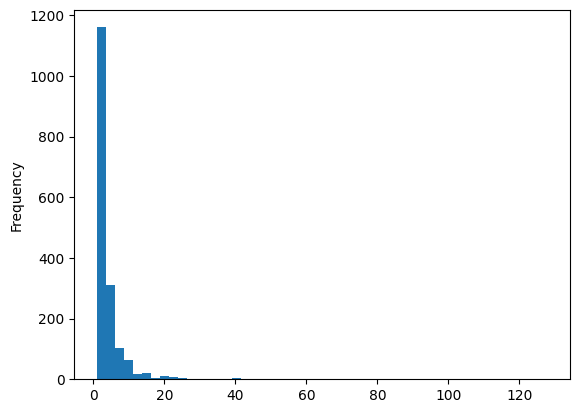

In [18]:
plt.figure();

ezhulenev_per_commit_df['programming'].replace(0, np.nan).plot.hist(bins=50)

<Axes: ylabel='Frequency'>

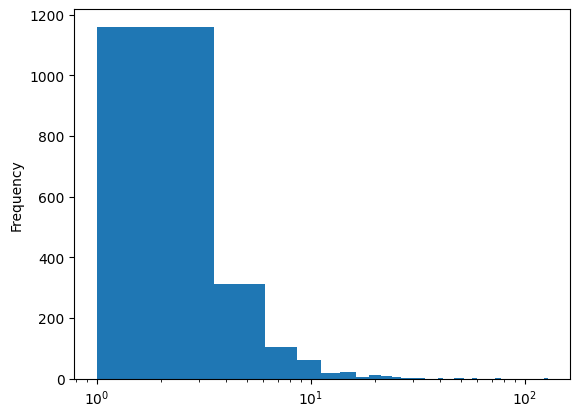

In [19]:
plt.figure();

ezhulenev_per_commit_df['programming'].replace(0, np.nan).plot.hist(bins=50, logx=True)

<Axes: ylabel='Frequency'>

<Figure size 640x480 with 0 Axes>

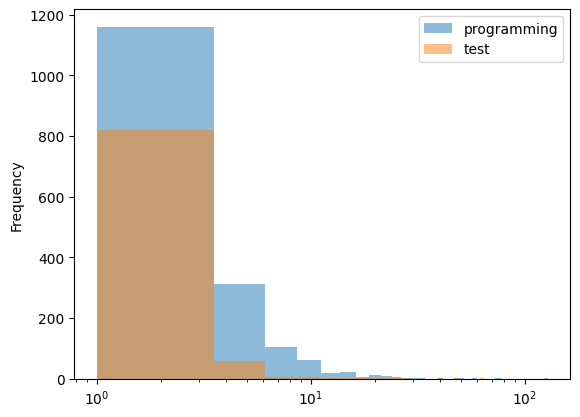

In [20]:
plt.figure();

ezhulenev_per_commit_df[['programming', 'test']].replace(0, np.nan).plot.hist(bins=50, logx=True, alpha=0.5)

<Axes: ylabel='Density'>

<Figure size 640x480 with 0 Axes>

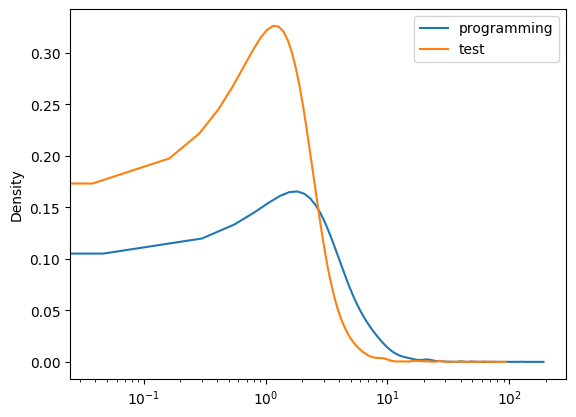

In [38]:
plt.figure();

ezhulenev_per_commit_df[['programming', 'test']].replace(0, np.nan).plot.kde(logx=True)  # not filled

<Axes: ylabel='Density'>

<Figure size 640x480 with 0 Axes>

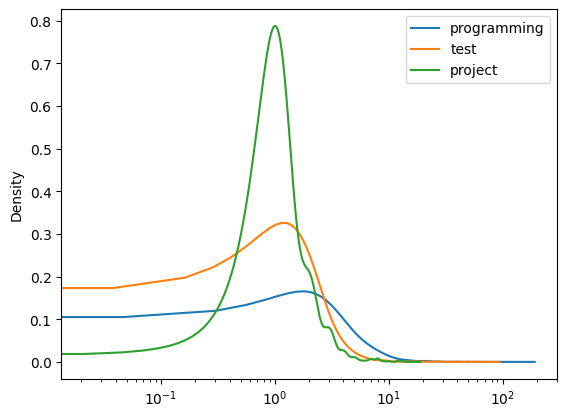

In [37]:
plt.figure();

ezhulenev_per_commit_df[['programming', 'test', 'project']].replace(0, np.nan).plot.kde(logx=True)  # not filled

<Axes: ylabel='Frequency'>

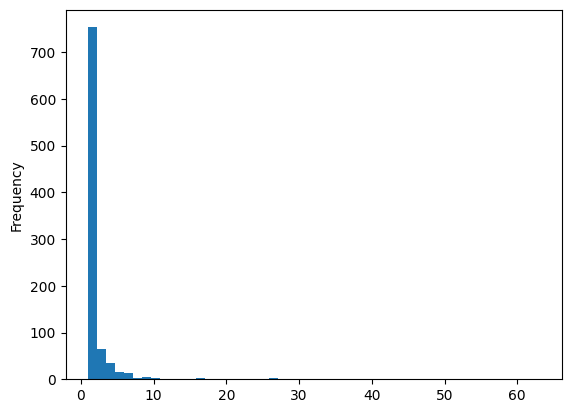

In [22]:
ezhulenev_per_commit_df['test'].replace(0, np.nan).plot.hist(bins=50)

<Axes: ylabel='Frequency'>

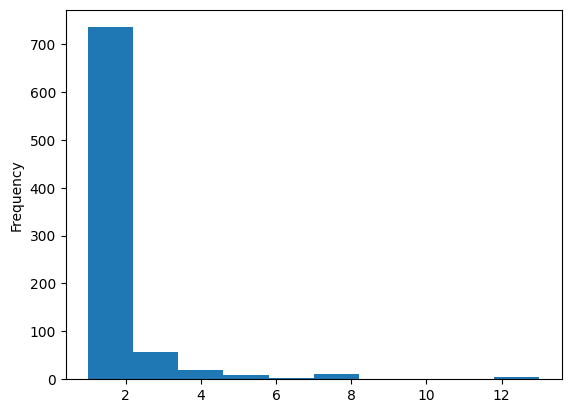

In [23]:
ezhulenev_per_commit_df['project'].replace(0, np.nan).plot.hist()

#### Split between categories, per commit

<Axes: >

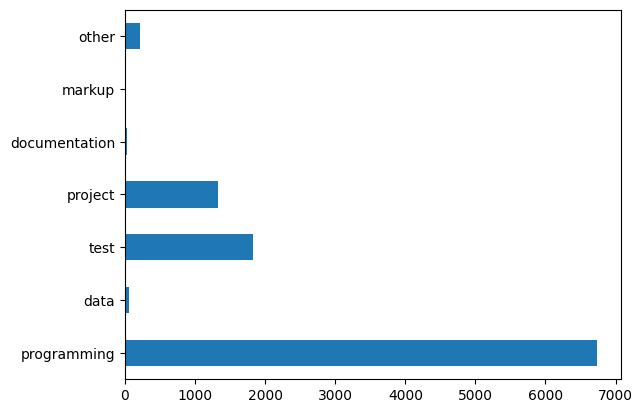

In [24]:
ezhulenev_per_commit_df[['programming','data','test','project','documentation','markup','other']].sum().plot.barh()

In [25]:
ezhulenev_per_commit_df['programming or test'] = (ezhulenev_per_commit_df['programming'] > 0) | (ezhulenev_per_commit_df['test'] > 0)
ezhulenev_per_commit_df['programming > 0'] = ezhulenev_per_commit_df['programming'] > 0
ezhulenev_per_commit_df['test > 0'] = ezhulenev_per_commit_df['test'] > 0
ezhulenev_per_commit_df['programming >= test'] = ezhulenev_per_commit_df['programming'] >= ezhulenev_per_commit_df['test']
ezhulenev_per_commit_df['programming < test'] = ezhulenev_per_commit_df['programming'] < ezhulenev_per_commit_df['test']

In [26]:
ezhulenev_per_commit_df['programming, no test'] = (ezhulenev_per_commit_df['programming'] > 0) & (ezhulenev_per_commit_df['test'] == 0)
ezhulenev_per_commit_df['test, no programming'] = (ezhulenev_per_commit_df['programming'] == 0) & (ezhulenev_per_commit_df['test'] > 0)
ezhulenev_per_commit_df['programming < test && programming'] = ezhulenev_per_commit_df['programming < test'] & ezhulenev_per_commit_df['programming > 0']
ezhulenev_per_commit_df['programming >= test && test'] = ezhulenev_per_commit_df['programming >= test'] & ezhulenev_per_commit_df['test > 0']

In [27]:
ezhulenev_per_commit_df[['programming or test', 'programming > 0', 'test > 0', 'programming >= test', 'programming < test']].sum()

programming or test    1835
programming > 0        1719
test > 0                902
programming >= test    1697
programming < test      198
dtype: Int64

In [28]:
ezhulenev_per_commit_df.shape

(1895, 16)

In [29]:
ezhulenev_per_commit_df[ezhulenev_per_commit_df['programming or test']][['programming or test', 'programming > 0', 'test > 0', 'programming < test']].sum()

programming or test    1835
programming > 0        1719
test > 0                902
programming < test      198
dtype: Int64

<Axes: >

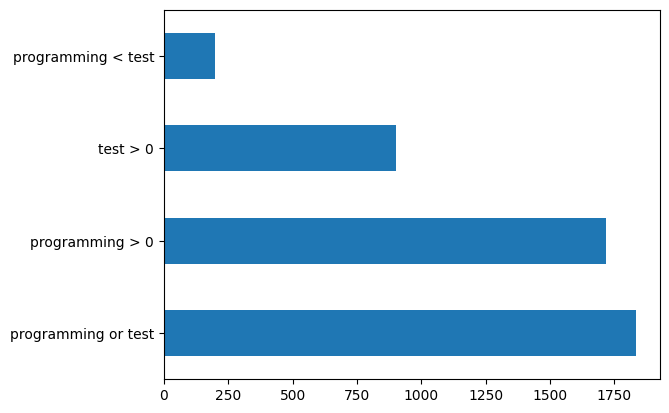

In [30]:
ezhulenev_per_commit_df[ezhulenev_per_commit_df['programming or test']][['programming or test', 'programming > 0', 'test > 0', 'programming < test']].sum().plot.barh()

In [31]:
ezhulenev_split_bool = ezhulenev_per_commit_df[ezhulenev_per_commit_df['programming or test']][['programming, no test', 'programming >= test && test', 'programming < test && programming', 'test, no programming']]
ezhulenev_split_sum = ezhulenev_split_bool.sum()
ezhulenev_split_sum

programming, no test                 933
programming >= test && test          704
programming < test && programming     82
test, no programming                 116
dtype: Int64

In [32]:
ezhulenev_split_sum.sum()

np.int64(1835)

In [33]:
ezhulenev_per_commit_df['programming or test'].sum()

np.int64(1835)

<Axes: >

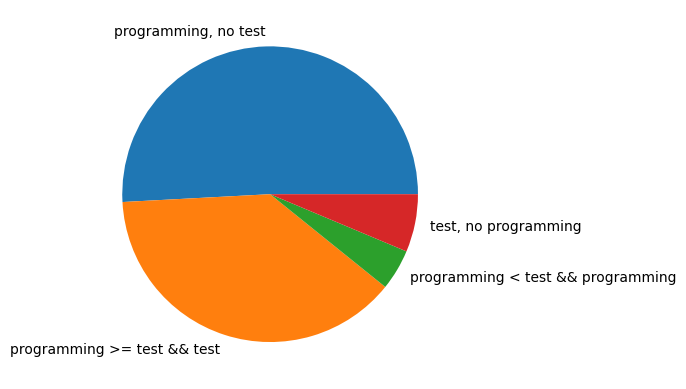

In [34]:
ezhulenev_split_sum.plot.pie()

#### Pairwise correlation between categories, per commit

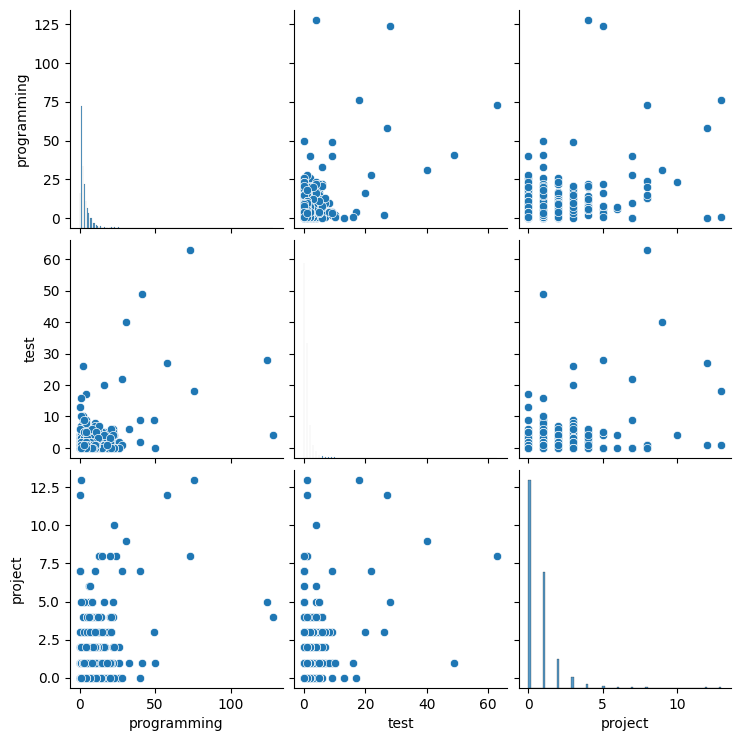

In [40]:
sns.pairplot(data=ezhulenev_per_commit_df[['programming', 'test', 'project']])

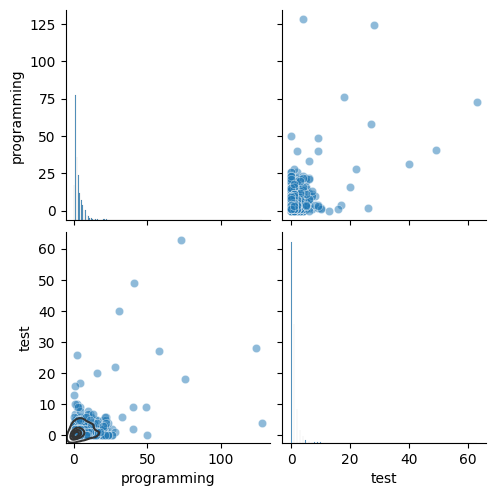

In [44]:
g = sns.pairplot(data=ezhulenev_per_commit_df[['programming', 'test']], plot_kws=dict(alpha=0.5))
g.map_lower(sns.kdeplot, levels=5, color=".2")

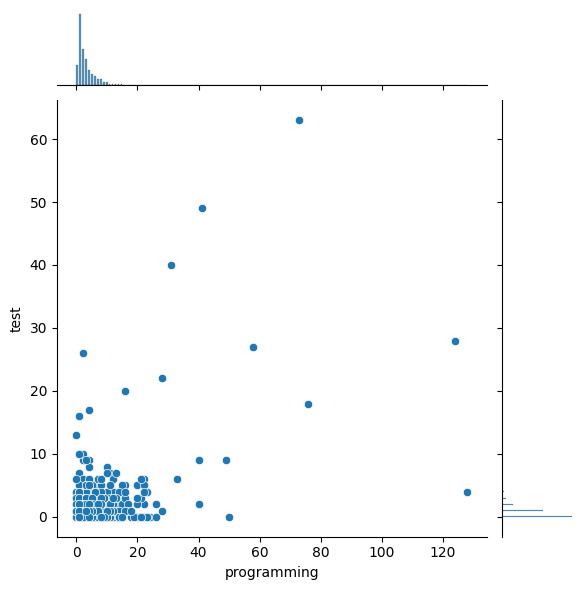

In [47]:
sns.jointplot(data=ezhulenev_per_commit_df, x="programming", y="test")

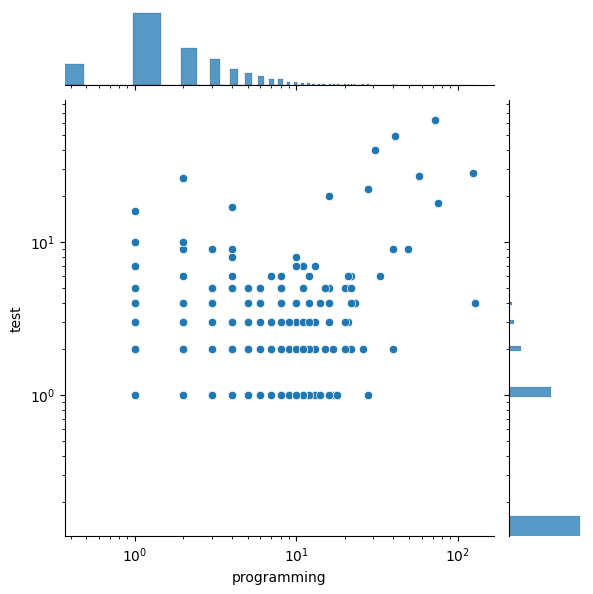

In [49]:
g = sns.jointplot(data=ezhulenev_per_commit_df, x="programming", y="test")

g.ax_joint.set_xscale('log')
g.ax_joint.set_yscale('log')

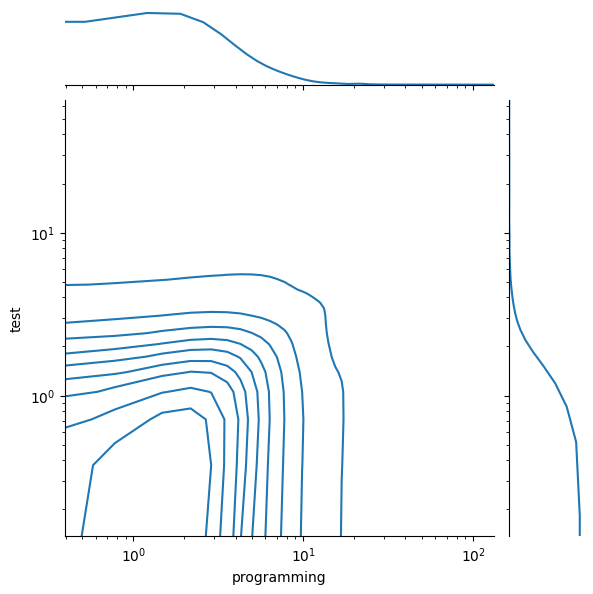

In [50]:
g = sns.jointplot(data=ezhulenev_per_commit_df, x="programming", y="test", kind="kde")

g.ax_joint.set_xscale('log')
g.ax_joint.set_yscale('log')

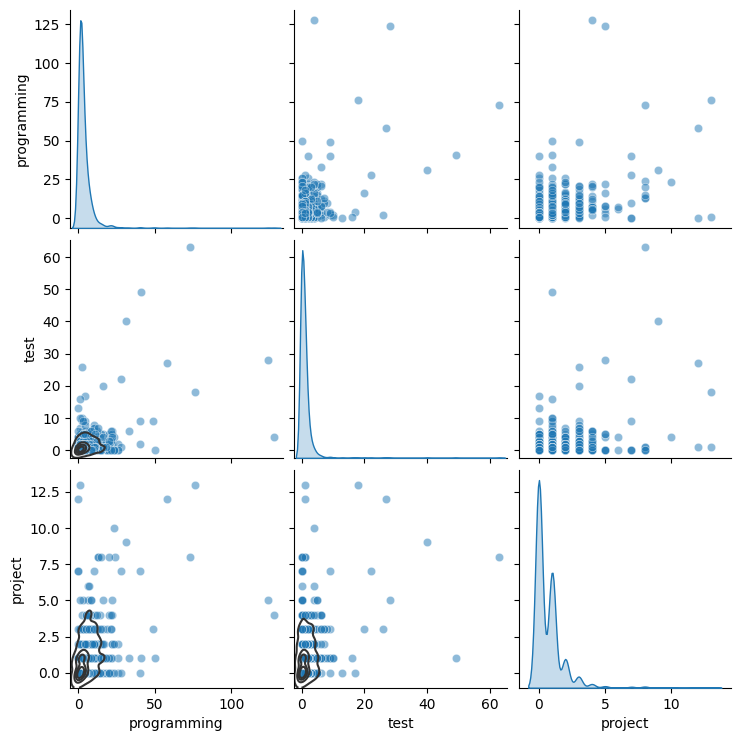

In [46]:
g = sns.pairplot(data=ezhulenev_per_commit_df[['programming', 'test', 'project']], diag_kind='kde', plot_kws=dict(alpha=0.5))
g.map_lower(sns.kdeplot, levels=5, color=".2")

### Line purposes

The annotation data was generated from the `tensorflow` repository with the following command:
```commandline
diff-annotate from-repo \
    --output-dir=~/example_annotations/tensorflow/ezhulenev/ \
    ~/example_repositories/tensorflow/ \
    --author=ezhulenev@google.com
```

This generates annotations in the "flat" format.

To make them compatibile with "hierarchical" / "bugsinpy" format that `diff-gather-stats` script expects
you need to create `annotation/` directory in each of "bug" directories, and move `*.json` files there:
```commandline
cd ~/example_annotations/tensorflow/ezhulenev/
mkdir annotation
mv *.json annotation/
```

-----

The statistics in `tensorflow.lines-stats.json` file were generated with the following command:
```commandline
diff-gather-stats lines-stats \
    ~/example_annotations/tensorflow.lines-stats.json \
    ~/example_annotations/tensorflow/
```

In [5]:
with open('/home/jnareb/example_annotations/tensorflow.lines-stats.json', mode='r') as json_fp:
    tf_ezhulenev_lines_data = json.load(json_fp)

In [6]:
ezhulenev_lines_data = tf_ezhulenev_lines_data['tensorflow']['ezhulenev']

In [10]:
ezhulenev_lines_data['185a326927da6e1d5ca8dbb8506d4d353780bd2e.json']

{'tensorflow/workspace.bzl': {'language': 'Starlark',
  'type': 'programming',
  'purpose': 'programming',
  '+': {'count': 4, 'type.code': 4, 'purpose.programming': 4},
  '-': {'count': 4, 'type.code': 4, 'purpose.programming': 4},
  '+/-': {'type.code': 8, 'purpose.programming': 8}}}

#### Number of removed/added lines

In [16]:
ezhulenev_lines_records = []
for patch_name, patch_data in ezhulenev_lines_data.items():
    for file_name, file_data in patch_data.items():
        if file_name == '/dev/null':
            continue

        record = {
            'patchname': patch_name.removesuffix('.json'),
            'filename': file_name,
            'language': file_data['language'],
            'file_type': file_data['type'],
            'file_purpose': file_data['purpose'],
        }
        if '+' in file_data and 'count' in file_data['+']:
            record['+ count'] = file_data['+']['count']
        else:
            record['+ count'] = 0

        if '-' in file_data and 'count' in file_data['-']:
            record['- count'] = file_data['-']['count']
        else:
            record['- count'] = 0
        
        # TODO: process per-line type/purpose counts

        ezhulenev_lines_records.append(record)

In [19]:
ezhulenev_lines_records[:3]

[{'patchname': '185a326927da6e1d5ca8dbb8506d4d353780bd2e',
  'filename': 'tensorflow/workspace.bzl',
  'language': 'Starlark',
  'file_type': 'programming',
  'file_purpose': 'programming',
  '+ count': 4,
  '- count': 4},
 {'patchname': 'cdd37b886e0ac509320fc7391f9f1ac922c06454',
  'filename': 'third_party/xla/xla/service/cpu/benchmarks/BUILD',
  'language': 'Starlark',
  'file_type': 'programming',
  'file_purpose': 'project',
  '+ count': 16,
  '- count': 0},
 {'patchname': 'cdd37b886e0ac509320fc7391f9f1ac922c06454',
  'filename': 'third_party/xla/xla/service/cpu/benchmarks/optimizer_benchmark_test.cc',
  'language': 'C++',
  'file_type': 'programming',
  'file_purpose': 'test',
  '+ count': 121,
  '- count': 0}]

In [20]:
ezhulenev_lines_df = pd.DataFrame.from_records(ezhulenev_lines_records).convert_dtypes()
ezhulenev_lines_df

,patchname,filename,language,file_type,file_purpose,+ count,- count
0,185a326927da6e1d5ca8dbb8506d4d353780bd2e,tensorflow/workspace.bzl,Starlark,programming,programming,4,4
1,cdd37b886e0ac509320fc7391f9f1ac922c06454,third_party/xla/xla/service/cpu/benchmarks/BUILD,Starlark,programming,project,16,0
2,cdd37b886e0ac509320fc7391f9f1ac922c06454,third_party/xla/xla/service/cpu/benchmarks/opt...,C++,programming,test,121,0
3,286e7d4b24b4235ca71027b1a68d5619e1c70d8a,third_party/xla/xla/service/cpu/BUILD,Starlark,programming,project,5,38
4,286e7d4b24b4235ca71027b1a68d5619e1c70d8a,third_party/xla/xla/service/cpu/dot_op_emitter.cc,C++,programming,programming,27,134
...,...,...,...,...,...,...,...
10193,1a6ed44670279ff61e9d984067127acf5704344f,third_party/xla/xla/stream_executor/gpu/gpu_dr...,C,programming,programming,38,0
10194,1a6ed44670279ff61e9d984067127acf5704344f,third_party/xla/xla/stream_executor/gpu/gpu_ex...,C,programming,programming,7,0
10195,1a6ed44670279ff61e9d984067127acf5704344f,third_party/xla/xla/stream_executor/gpu/gpu_ty...,C,programming,programming,10,0
10196,1a6ed44670279ff61e9d984067127acf5704344f,third_party/xla/xla/stream_executor/stream_exe...,C,programming,programming,9,0


In [21]:
ezhulenev_lines_df.describe()

,+ count,- count
count,10198.0,10198.0
mean,19.354481,14.84948
std,49.525959,66.76792
min,0.0,0.0
25%,1.0,0.0
50%,4.0,2.0
75%,17.0,7.0
max,1356.0,2075.0


In [26]:
ezhulenev_lines_df_per_commit = ezhulenev_lines_df.groupby('patchname')[[ '- count', '+ count']].sum()
ezhulenev_lines_df_per_commit

,- count,+ count
patchname,,
0024f5d08dff98bd78ed48f5a46226d048583be7,6,38
003ab23a4dfc645eb9d41b9d0fc0c98a8ca3b73d,1,109
00652e6e6a0ffb9c60a21ac91680bc1ac5528bc4,2199,0
0071c1738eb5248fe9993bc7e437fa63e3a17742,6,58
007eb8a5b793ecbaa648b2e894df4f4c846a6156,105,90
...,...,...
ff3da2b31150f2dca37cfa1aff72418c6a89550f,7,7
ff3db2d32584175c67c11a2be36b54170bae473d,11,51
ffac1f66df235e8876d1140d2b37af6cc80ed890,6,30


In [27]:
ezhulenev_lines_df_per_commit.describe()

,- count,+ count
count,1895.0,1895.0
mean,79.912929,104.156728
std,509.700455,186.266577
min,0.0,0.0
25%,3.0,10.0
50%,14.0,43.0
75%,46.0,123.0
max,12875.0,2795.0


<Axes: ylabel='Frequency'>

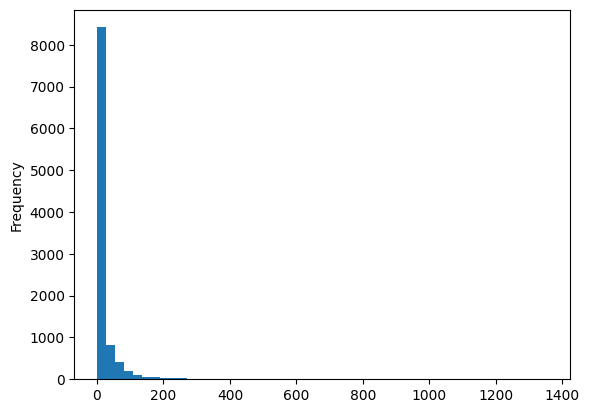

In [30]:
ezhulenev_lines_df['+ count'].plot.hist(bins=50)

<Axes: ylabel='Frequency'>

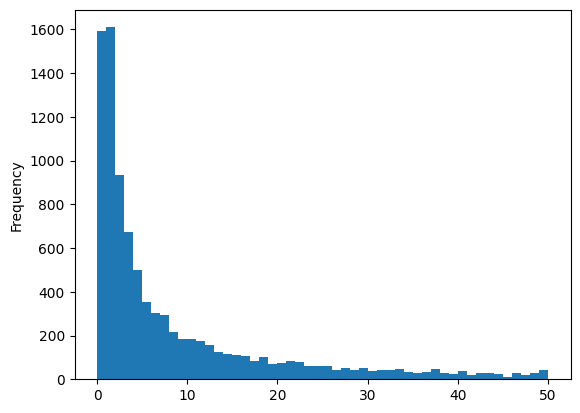

In [31]:
ezhulenev_lines_df['+ count'].plot.hist(bins=50, range=(0,50))

<Axes: ylabel='Frequency'>

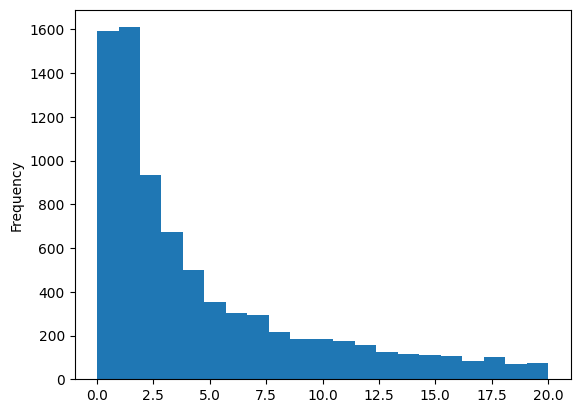

In [36]:
ezhulenev_lines_df['+ count'].plot.hist(bins=21, range=(0,20))

<Axes: ylabel='Frequency'>

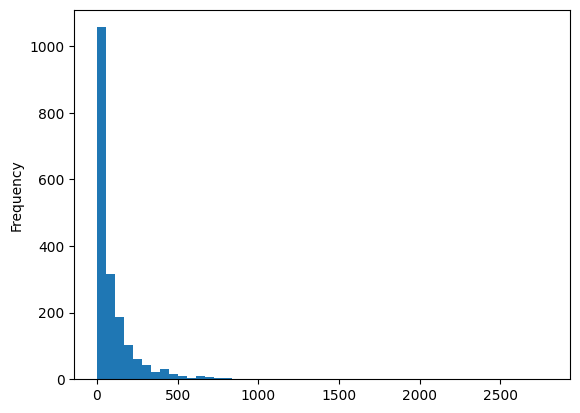

In [37]:
ezhulenev_lines_df_per_commit['+ count'].plot.hist(bins=50)

<Axes: ylabel='Frequency'>

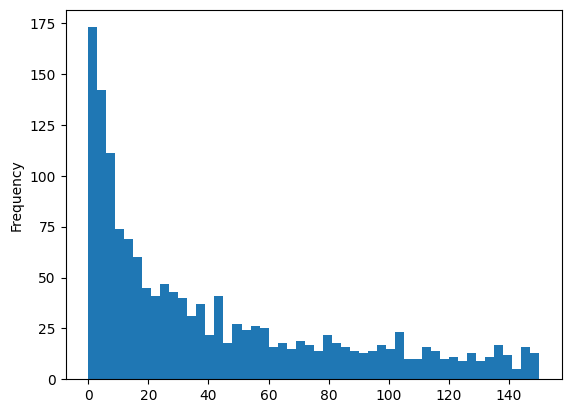

In [39]:
ezhulenev_lines_df_per_commit['+ count'].plot.hist(bins=50, range=(0,150))

Bihistogram, based on<br>
https://matplotlib.org/stable/gallery/statistics/histogram_bihistogram.html

In [46]:
added_counts   = ezhulenev_lines_df_per_commit['+ count'].values
removed_counts = ezhulenev_lines_df_per_commit['- count'].values

print(f"{len(added_counts)=}, {len(removed_counts)=}")
print(f"{max(added_counts)=}, {max(removed_counts)=}")

len(added_counts)=1895, len(removed_counts)=1895
max(added_counts)=np.int64(2795), max(removed_counts)=np.int64(12875)


In [47]:
# Use a constant bin width to make the two histograms easier to compare visually
bin_width = 1
max_value = 50

bins = np.arange(0, max_value + bin_width, bin_width)
bins

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50])

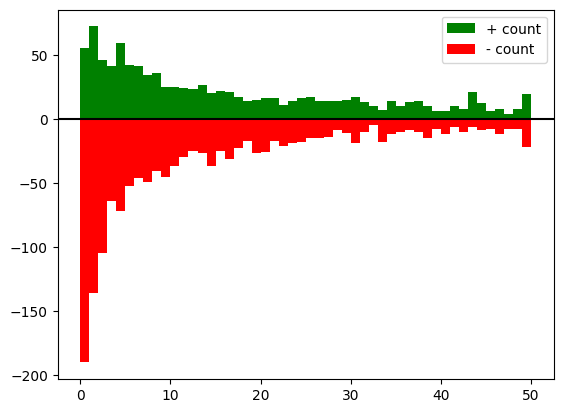

In [50]:
def bihistogram(dataset1, dataset2, dataset1_name, dataset2_name, bins):
    fig, ax = plt.subplots()

    # Plot the first histogram
    ax.hist(dataset1, bins=bins, label=dataset1_name, color='g')

    # Plot the second histogram
    # (notice the negative weights, which flip the histogram upside down)
    ax.hist(dataset2, weights=-np.ones_like(removed_counts), bins=bins, label=dataset2_name, color='r')
    ax.axhline(0, color="k")
    ax.legend()

    plt.show()

bihistogram(added_counts, removed_counts, '+ count', '- count', bins)

[  0   3   6   9  12  15  18  21  24  27  30  33  36  39  42  45  48  51
  54  57  60  63  66  69  72  75  78  81  84  87  90  93  96  99 102 105
 108 111 114 117 120 123 126 129 132 135 138 141 144 147 150]


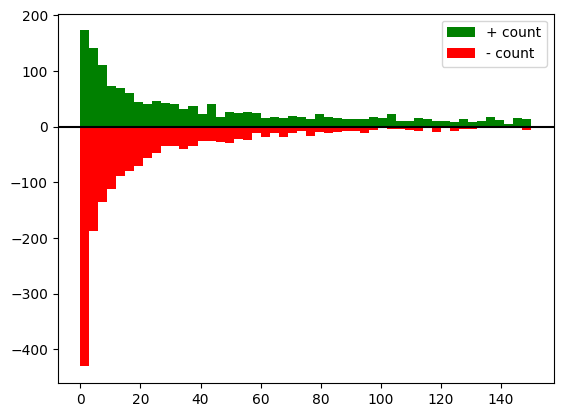

In [52]:
# Use a constant bin width to make the two histograms easier to compare visually
bin_width = 3
max_value = 150

bins = np.arange(0, max_value + bin_width, bin_width)
print(bins)

bihistogram(added_counts, removed_counts, '+ count', '- count', bins)

[  0   5  10  15  20  25  30  35  40  45  50  55  60  65  70  75  80  85
  90  95 100 105 110 115 120 125 130 135 140 145 150 155 160 165 170 175
 180 185 190 195 200 205 210 215 220 225 230 235 240 245 250 255 260 265
 270 275 280 285 290 295 300 305 310 315 320 325 330 335 340 345 350 355
 360 365 370 375 380 385 390 395 400 405 410 415 420 425 430 435 440 445
 450 455 460 465 470 475 480 485 490 495 500]


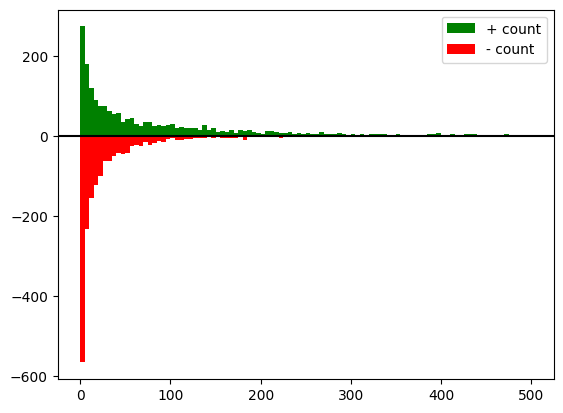

In [53]:
# Use a constant bin width to make the two histograms easier to compare visually
bin_width = 5
max_value = 500

bins = np.arange(0, max_value + bin_width, bin_width)
print(bins)

bihistogram(added_counts, removed_counts, '+ count', '- count', bins)